In [3]:
from io import StringIO

import keras
import requests
import os
import pandas as pd


url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=60min&apikey={os.getenv("ALPHAVANTAGE_API_KEY")}&datatype=csv'
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)
display(df)


,timestamp,open,high,low,close,volume
0,2024-10-04 19:00:00,226.00,226.00,221.060,225.900,508309
1,2024-10-04 18:00:00,225.99,226.00,225.800,225.810,508615
2,2024-10-04 17:00:00,225.91,226.00,225.800,226.000,389
3,2024-10-04 16:00:00,225.95,226.00,225.500,225.910,1741998
4,2024-10-04 15:00:00,225.12,226.08,224.940,225.950,810175
...,...,...,...,...,...,...
95,2024-09-27 04:00:00,223.58,223.58,222.740,222.860,212
96,2024-09-26 19:00:00,223.43,223.78,223.200,223.780,454069
97,2024-09-26 18:00:00,223.59,223.78,223.360,223.780,454970
98,2024-09-26 17:00:00,223.43,223.59,223.395,223.400,1737


In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
 
# class MinMaxScaler:
#     def __init__(self, feature_range=(0, 1)):
#         self.min_ = None  # Minimum of each feature in the training set
#         self.max_ = None  # Maximum of each feature in the training set
#         self.data_min_ = None  # Min value found during fit
#         self.data_max_ = None  # Max value found during fit
#         self.scale_ = None  # Scale factor for each feature
#         self.feature_range = feature_range  # Desired output range (default: 0 to 1)
# 
#     def fit(self, X):
#         """
#         Compute the minimum and maximum to be used for later scaling.
#         """
#         self.data_min_ = np.min(X, axis=0)
#         self.data_max_ = np.max(X, axis=0)
# 
#         # Range of the original data
#         data_range = self.data_max_ - self.data_min_
# 
#         # Desired output range
#         feature_range_min, feature_range_max = self.feature_range
# 
#         # Scale factor is the ratio of the desired range to the original range
#         self.scale_ = (feature_range_max - feature_range_min) / data_range
#         self.min_ = feature_range_min - self.data_min_ * self.scale_
# 
#         return self
# 
#     def transform(self, X):
#         """
#         Scale the data according to the previously computed min_ and scale_.
#         """
#         return X * self.scale_ + self.min_
# 
#     def fit_transform(self, X):
#         """
#         Fit to data, then transform it.
#         """
#         return self.fit(X).transform(X)

# data = data.readlines()
close_prices = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

train_size = int(len(close_prices_scaled) * 0.7)
train_data, test_data = close_prices_scaled[:train_size], close_prices_scaled[train_size:]
# print(close_prices_scaled)
# print('Length of close_prices_scaled:', len(close_prices_scaled))



[[0.98809524]
 [0.97738095]
 [1.        ]
 [0.98928571]
 [0.99404762]
 [0.89464286]
 [0.83928571]
 [0.8452381 ]
 [0.84047619]
 [0.72678571]
 [0.76071429]
 [0.575     ]
 [0.58571429]
 [0.54880952]
 [0.56666667]
 [0.54047619]
 [0.60119048]
 [0.58333333]
 [0.59964286]
 [0.53571429]
 [0.6       ]
 [0.44404762]
 [0.43809524]
 [0.38563095]
 [0.52142857]
 [0.4375    ]
 [0.31309524]
 [0.13690476]
 [0.1452381 ]
 [0.16666667]
 [0.05119048]
 [0.1702381 ]
 [0.26785714]
 [0.25595238]
 [0.32142857]
 [0.26547619]
 [0.24642857]
 [0.27142857]
 [0.2125    ]
 [0.10714286]
 [0.18809524]
 [0.13333333]
 [0.03095238]
 [0.        ]
 [0.01428571]
 [0.02142857]
 [0.06428571]
 [0.19047619]
 [0.14880952]
 [0.16547619]
 [0.25357143]
 [0.22619048]
 [0.20952381]
 [0.11904762]
 [0.20059524]
 [0.10238095]
 [0.15119048]
 [0.15319048]
 [0.16845238]
 [0.30714286]
 [0.3047619 ]
 [0.31785714]
 [0.35714286]
 [0.3797619 ]
 [0.33333333]
 [0.33928571]
 [0.30952381]
 [0.41071429]
 [0.41190476]
 [0.24642857]
 [0.27738095]
 [0.30

x shape before reshaping: (90, 10, 1)
x shape after reshaping: (90, 10, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 25)                2700      
                                                                 
 dropout_10 (Dropout)        (None, 25)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2726 (10.65 KB)
Trainable params: 2726 (10.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 0.0792 - val_loss: 0.2038
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.1073
Epoch 3/100
9

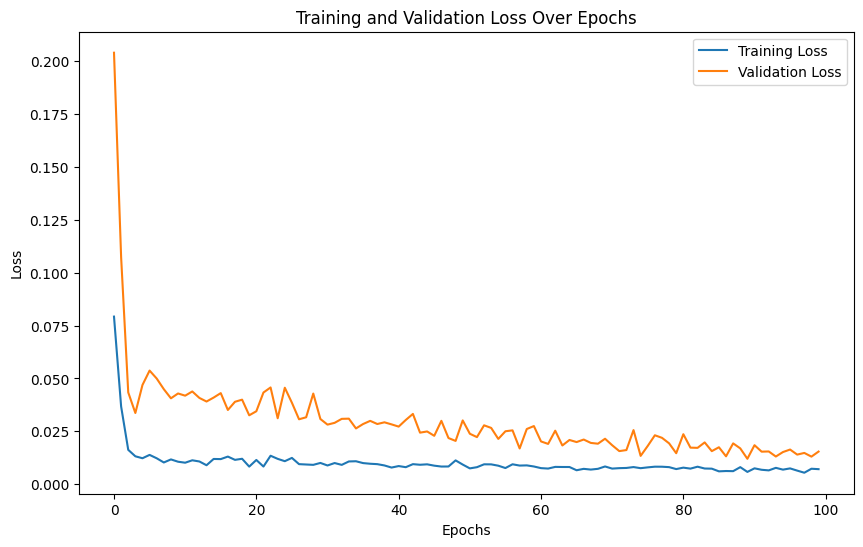

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

def create_lstm_data(data, time_steps=1):
 x, y = [], []
 for i in range(len(data) - time_steps):
  x.append(data[i:(i + time_steps)])
  y.append(data[i + time_steps])
 return np.array(x), np.array(y)

time_steps = 10

# Check if data length is sufficient
if len(close_prices_scaled) <= time_steps:
    raise ValueError(f"Data length ({len(close_prices_scaled)}) must be greater than time_steps ({time_steps}).")

x, y = create_lstm_data(close_prices_scaled, time_steps)
print('x shape before reshaping:', x.shape)

x = np.reshape(x, (x.shape[0], x.shape[1], 1))

print('x shape after reshaping:', x.shape)


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=25, input_shape=(x.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()



history = model.fit(x, y, epochs=100, batch_size=8, validation_split=0.2)

train_loss = model.evaluate(x, y, verbose=0)

print(f'Train Loss: {train_loss:.6f}')


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

x shape before reshaping: (95, 5, 1)
x shape after reshaping: (95, 5, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 25)                2700      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2726 (10.65 KB)
Trainable params: 2726 (10.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.0979 - val_loss: 0.1909
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.1196
Epoch 3/100


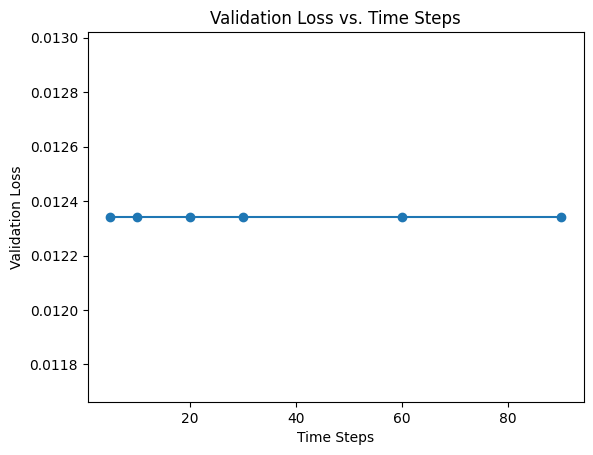

In [18]:
# time_steps_list = [5, 10, 20, 30, 60, 90]
# results = []
# 
# for time_steps in time_steps_list:
#     x, y = create_lstm_data(close_prices_scaled, time_steps)
#     print('x shape before reshaping:', x.shape)
# 
#     x = np.reshape(x, (x.shape[0], x.shape[1], 1))
# 
#     print('x shape after reshaping:', x.shape)
# 
# 
# 
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.LSTM(units=25, input_shape=(x.shape[1], 1)))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.Dense(units=1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
# 
#     model.summary()
# 
#     model.fit(x, y, epochs=100, batch_size=8, validation_split=0.2)
#     
#     val_loss = min(history.history['val_loss'])
#     results.append({'time_steps': time_steps, 'val_loss': val_loss})
#     
#     
# import matplotlib.pyplot as plt
# 
# time_steps_values = [result['time_steps'] for result in results]
# val_losses = [result['val_loss'] for result in results]
# 
# plt.plot(time_steps_values, val_losses, marker='o')
# plt.title('Validation Loss vs. Time Steps')
# plt.xlabel('Time Steps')
# plt.ylabel('Validation Loss')
# plt.show()

3/3 [==============================] - 0s 1ms/step


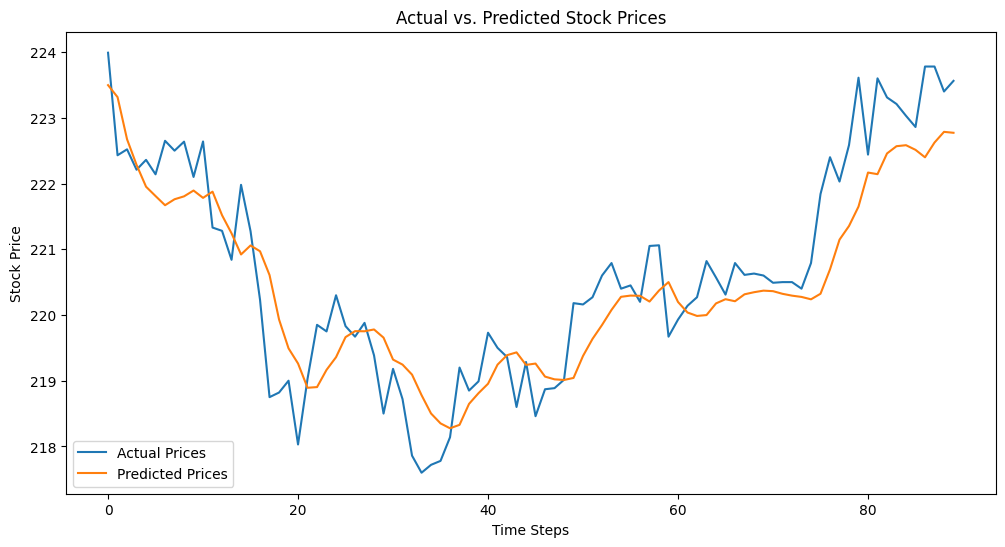

In [23]:
# Predict closing prices
train_predictions = model.predict(x)

# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train_unscaled, label='Actual Prices')
plt.plot(train_predictions, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()